In [25]:
# Step 1: Import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [26]:
# Step 2: Define the CNN model
class AnimalDetectionCNN(nn.Module):
    def __init__(self, num_classes=2):  # Default is 2 classes (e.g., 'animal', 'no animal')
        super(AnimalDetectionCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Max pooling and dropout layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.3)

        # Fully connected layers
        # After 3 pooling layers: 224 -> 112 -> 56 -> 28
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

print("✅ CNN class defined!")


✅ CNN class defined!


In [ ]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train'
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Detected classes:", class_names)

num_classes = len(class_names)
print("Number of classes:", num_classes)

model = AnimalDetectionCNN(num_classes=num_classes)


Detected classes: ['Spider', 'Kangaroo', 'Canary', 'Parrot', 'Squid', 'Mule', 'Duck', 'Panda', 'Red panda', 'Bull', 'Raven', 'Elephant', 'Camel', 'Giraffe', 'Fox', 'Shark', 'Snake', 'Otter', 'Ladybug', 'Worm', 'Turkey', 'Lion', 'Ostrich', 'Tortoise', 'Mouse', 'Butterfly', 'Scorpion', 'Goldfish', 'Jaguar', 'Sea turtle', 'Zebra', 'Sea lion', 'Shrimp', 'Horse', 'Lynx', 'Jellyfish', 'Goat', 'Eagle', 'Goose', 'Bear', 'Koala', 'Magpie', 'Owl', 'Frog', 'Sparrow', 'Hamster', 'Moths and butterflies', 'Penguin', 'Fish', 'Centipede', 'Deer', 'Hippopotamus', 'Leopard', 'Sheep', 'Rabbit', 'Turtle', 'Raccoon', 'Polar bear', 'Tiger', 'Rhinoceros', 'Starfish', 'Caterpillar', 'Squirrel', 'Cheetah', 'Crab', 'Crocodile', 'Pig', 'Tick', 'Chicken', 'Woodpecker', 'Lizard', 'Snail', 'Hedgehog', 'Monkey', 'Cattle', 'Whale', 'Swan', 'Brown bear', 'Seahorse', 'Harbor seal']
Number of classes: 80



📸 Input shape: torch.Size([4, 3, 224, 224])
🔎 Output shape: torch.Size([4, 2])
📊 Output (raw class scores for each image):
 tensor([[-0.3879, -0.2543],
        [-0.5608, -0.3593],
        [-0.1172, -0.3761],
        [-0.7400, -0.1328]], grad_fn=<AddmmBackward0>)


In [ ]:
torch.save(model.state_dict(), 'animal_detection_cnn.pth')
print("✅ Model weights saved to 'animal_detection_cnn.pth'")


✅ Model weights saved to 'animal_detection_cnn.pth'


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antoreepjana/animals-detection-images-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals-detection-images-dataset


In [ ]:
import os

for root, dirs, files in os.walk(path):
    print(f"📁 {root}")
    for f in files[:5]:  # preview 5 files per folder
        print("  └──", f)


📁 /kaggle/input/animals-detection-images-dataset
📁 /kaggle/input/animals-detection-images-dataset/test
📁 /kaggle/input/animals-detection-images-dataset/test/Spider
  └── ee577821df67a483.jpg
  └── 8c922ad0ea78fecf.jpg
  └── 81067426068b965f.jpg
  └── 6904fd6dbcad110c.jpg
  └── 347221a32e893e8e.jpg
📁 /kaggle/input/animals-detection-images-dataset/test/Spider/Label
  └── b18a9b96a28787ef.txt
  └── 06665644cdd87b03.txt
  └── 54f049c072de2e0f.txt
  └── 81067426068b965f.txt
  └── 8b7c48ff41ef9dfe.txt
📁 /kaggle/input/animals-detection-images-dataset/test/Parrot
  └── 6ad02fe92717854b.jpg
  └── 094471e37d9fccfe.jpg
  └── 7a5529050cb5cffb.jpg
  └── a5fed45c5a6514d8.jpg
  └── 20c63228df57c6d9.jpg
📁 /kaggle/input/animals-detection-images-dataset/test/Parrot/Label
  └── 3ce78fd962d3f31c.txt
  └── cfdf64f6f66e32ec.txt
  └── 3dbc9e9e9d93b732.txt
  └── 9df2131e7e46860a.txt
  └── d0afdbf7ce49715d.txt
📁 /kaggle/input/animals-detection-images-dataset/test/Scorpion
  └── e0c3e992da1c1f9e.jpg
  └── a0f49

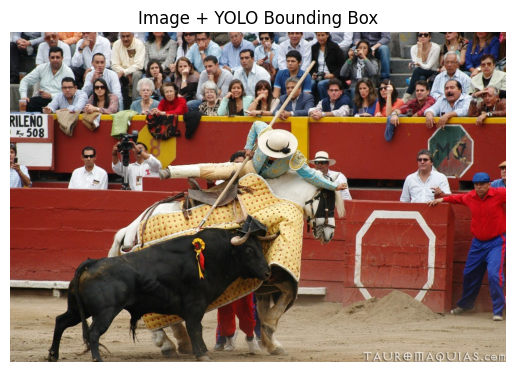

In [27]:
import cv2
import matplotlib.pyplot as plt

img_path = os.path.join(img_dir, img_files[0])
label_path = os.path.join(label_dir, os.path.splitext(img_files[0])[0] + ".txt")

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

with open(label_path, 'r') as f:
    for line in f:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(img)
plt.axis('off')
plt.title("Image + YOLO Bounding Box")
plt.show()


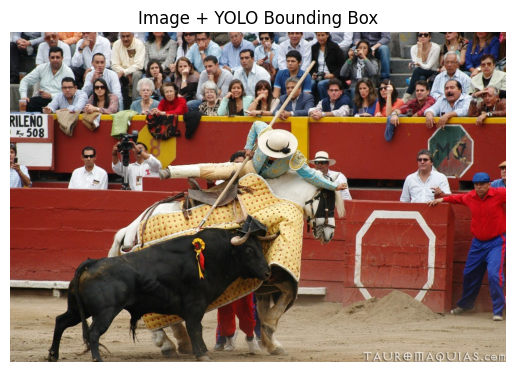

In [28]:
  import os
import cv2
import matplotlib.pyplot as plt

# Step 1: Define paths again
img_dir = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train/Bull'
label_dir = os.path.join(img_dir, 'Label')

# Step 2: Get one sample image file
img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
img_path = os.path.join(img_dir, img_files[0])

# Step 3: Get matching label file
label_path = os.path.join(label_dir, os.path.splitext(img_files[0])[0] + ".txt")

# Step 4: Load and draw bounding box
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# Step 5: Read YOLO label and draw box
with open(label_path, 'r') as f:
    for line in f:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"Class: {int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Step 6: Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Image + YOLO Bounding Box")
plt.show()


In [30]:
import os

# 🐮 STEP 1: Define path to main animal folder
main_dir = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train'

# 🐵 STEP 2: Automatically detect class names from folder structure
class_names = [name for name in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, name))]

# 🆔 Create class-to-id mapping
class_to_id = {name: idx for idx, name in enumerate(sorted(class_names))}
print("📚 Class to ID mapping:", class_to_id)

# 🧹 STEP 3: Loop over each class folder and fix labels
for class_name in class_names:
    label_folder = os.path.join(main_dir, class_name, 'Label')

    if not os.path.exists(label_folder):
        print(f"⚠️ No 'Label' folder for class {class_name}")
        continue

    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_folder, label_file)

            with open(label_path, 'r') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5 and parts[0] in class_to_id:
                    class_id = class_to_id[parts[0]]
                    new_line = f"{class_id} {' '.join(parts[1:])}\n"
                    new_lines.append(new_line)
                else:
                    print(f"❌ Skipping malformed line in {label_file}: {line.strip()}")

            with open(label_path, 'w') as f:
                f.writelines(new_lines)

print("✅ Conversion complete! All label files now use YOLO class IDs.")


Streaming output truncated to the last 5000 lines.
❌ Skipping malformed line in 38ad5c7928c6d141.txt: 68 336.0 360.97822699999995 544.64 654.112096
❌ Skipping malformed line in d9edb4c792eaeb73.txt: 68 532.48 314.88 631.68 480.0
❌ Skipping malformed line in aaaa9a5d5da0a4a5.txt: 68 240.19763199999997 47.730977 908.817408 296.21137
❌ Skipping malformed line in 4bbd94389d37e292.txt: 68 273.28 135.03974399999998 630.4 732.800256
❌ Skipping malformed line in 06dd2634cc57924e.txt: 68 450.56 17.28 954.24 563.2001280000001
❌ Skipping malformed line in 1bd1d0ffc68e2b4c.txt: 68 0.0 65.28 801.28 776.96
❌ Skipping malformed line in e27d7942534aec4c.txt: 68 74.04236800000001 2.959488 1023.2596480000001 733.260128
❌ Skipping malformed line in 53aa2010f8c5eceb.txt: 68 268.004352 128.451933 782.7957759999999 681.354855
❌ Skipping malformed line in d3478ab61e287281.txt: 68 69.76 34.56 789.12 523.520256
❌ Skipping malformed line in 5953bb1801af549e.txt: 68 0.0 97.28006400000001 742.4 501.12
❌ Skipping 

In [31]:
# Save class names for data.yaml
with open('classes.txt', 'w') as f:
    for name in sorted(class_names):
        f.write(f"{name}\n")
print("📄 Saved 'classes.txt' with class list.")


📄 Saved 'classes.txt' with class list.


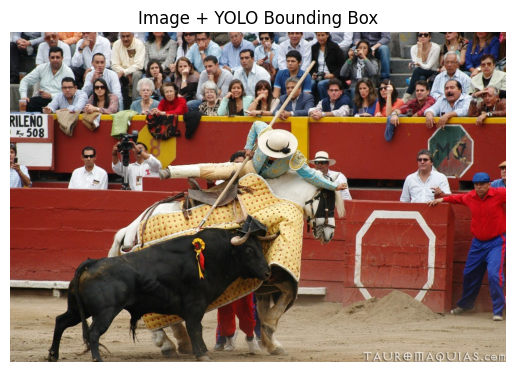

In [32]:
import os
import cv2
import matplotlib.pyplot as plt

# Step 1: Define paths again
img_dir = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train/Bull'
label_dir = os.path.join(img_dir, 'Label')

# Step 2: Get one sample image file
img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
img_path = os.path.join(img_dir, img_files[0])

# Step 3: Get matching label file
label_path = os.path.join(label_dir, os.path.splitext(img_files[0])[0] + ".txt")

# Step 4: Load and draw bounding box
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# Step 5: Read YOLO label and draw box
with open(label_path, 'r') as f:
    for line in f:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"Class: {int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Step 6: Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Image + YOLO Bounding Box")
plt.show()


In [33]:
# model = YourCNNModel()  # Initialize your model architecture
model.load_state_dict(torch.load('animal_detection_cnn.pth'))
model.eval()  # Set to evaluation mode


<ipython-input-33-35678c1e1295>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('animal_detection_cnn.pth'))


AnimalDetectionCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=80, bias=True)
)

NameError: name 'train_loader' is not defined

In [37]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_root = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train'

train_dataset = datasets.ImageFolder(root=train_root, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print("✅ train_loader ready with", len(train_dataset), "images and", len(train_loader), "batches")
print("Classes found:", train_dataset.classes)


✅ train_loader ready with 22566 images and 706 batches
Classes found: ['Bear', 'Brown bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Red panda', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Seahorse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [41]:
# Dataset directory
train_root = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train'

# Resize and convert images to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [42]:
# Load training data with labels based on subfolders
train_dataset = datasets.ImageFolder(root=train_root, transform=transform)

# Create batches of size 32 and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Print summary
print(f"Classes found: {train_dataset.classes}")
print(f"Total training images: {len(train_dataset)}")


Classes found: ['Bear', 'Brown bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Red panda', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Seahorse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']
Total training images: 22566


In [43]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [44]:
num_classes = len(train_dataset.classes)
model = SimpleCNN(num_classes=num_classes)
print(model)


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=50176, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=80, bias=True)
  )
)


In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [47]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    print(f"\n🚀 Starting Epoch {epoch+1}/{num_epochs}...")

    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Print progress every 10 batches
        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(train_loader):
            print(f"  🧪 Batch {batch_idx+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

    avg_loss = running_loss / len(train_loader)
    print(f"✅ Epoch [{epoch+1}/{num_epochs}] complete | Avg Loss: {avg_loss:.4f}")



🚀 Starting Epoch 1/5...
  🧪 Batch 10/706 | Loss: 3.7457
  🧪 Batch 20/706 | Loss: 4.0954
  🧪 Batch 30/706 | Loss: 3.8248
  🧪 Batch 40/706 | Loss: 3.5667
  🧪 Batch 50/706 | Loss: 3.5560
  🧪 Batch 60/706 | Loss: 3.7144
  🧪 Batch 70/706 | Loss: 3.7105
  🧪 Batch 80/706 | Loss: 3.8811
  🧪 Batch 90/706 | Loss: 3.8287
  🧪 Batch 100/706 | Loss: 3.8836
  🧪 Batch 110/706 | Loss: 3.9966
  🧪 Batch 120/706 | Loss: 3.8135
  🧪 Batch 130/706 | Loss: 3.9241
  🧪 Batch 140/706 | Loss: 3.9771
  🧪 Batch 150/706 | Loss: 3.7903
  🧪 Batch 160/706 | Loss: 3.7991
  🧪 Batch 170/706 | Loss: 3.8097
  🧪 Batch 180/706 | Loss: 3.8046
  🧪 Batch 190/706 | Loss: 3.6268
  🧪 Batch 200/706 | Loss: 3.7399
  🧪 Batch 210/706 | Loss: 3.7947
  🧪 Batch 220/706 | Loss: 3.8332
  🧪 Batch 230/706 | Loss: 3.6943
  🧪 Batch 240/706 | Loss: 3.6999
  🧪 Batch 250/706 | Loss: 3.4051
  🧪 Batch 260/706 | Loss: 3.8664
  🧪 Batch 270/706 | Loss: 3.6977
  🧪 Batch 280/706 | Loss: 3.8616
  🧪 Batch 290/706 | Loss: 3.8692
  🧪 Batch 300/706 | Loss: 3

In [49]:
def validate(model, data_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradient computation during validation
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(data_loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy


In [51]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the full dataset from your folder
dataset = datasets.ImageFolder(root='/content/drive/MyDrive/railkavach_dataset', transform=transform)

# 🔥 Split: 80% training, 20% validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Define DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/railkavach_dataset'

In [56]:
torch.save(model.state_dict(), 'animal_detection_cnn11.pth')
print("✅ Model saved as 'animal_detection_cnn11.pth'")



✅ Model saved as 'animal_detection_cnn11.pth'


In [58]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Your dataset root path
dataset_root = '/root/.cache/kagglehub/datasets/antoreepjana/animals-detection-images-dataset/versions/7/train'

# Your transform (already defined)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load the full dataset from the train folder
full_dataset = datasets.ImageFolder(root=dataset_root, transform=transform)

# Calculate lengths for train/val/test splits (e.g. 70%, 15%, 15%)
total_len = len(full_dataset)
train_len = int(0.7 * total_len)
val_len = int(0.15 * total_len)
test_len = total_len - train_len - val_len

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_len, val_len, test_len])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train samples: {train_len}")
print(f"Validation samples: {val_len}")
print(f"Test samples: {test_len}")


Train samples: 15796
Validation samples: 3384
Test samples: 3386


In [66]:
model.eval()  # set model to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [61]:
]

KeyboardInterrupt: 